In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Softmax, Input
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns

In [ ]:
!wget -q http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip

In [ ]:
!unzip NSL-KDD.zip


Archive:  NSL-KDD.zip
  inflating: index.html              
  inflating: KDDTest1.jpg            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTrain1.jpg           
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  


In [ ]:
features=["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","class"]

In [ ]:
kdd_data = pd.read_csv('KDDTrain+.txt',header=None)
kdd_data_test = pd.read_csv('KDDTest+.txt',header=None)

In [ ]:
print(len(kdd_data.columns))
len(kdd_data_test.columns)

43


43

In [ ]:
kdd_data = kdd_data.drop(columns=[42])
kdd_data_test = kdd_data_test.drop(columns=[42])
kdd_data.columns = features
kdd_data_test.columns = features

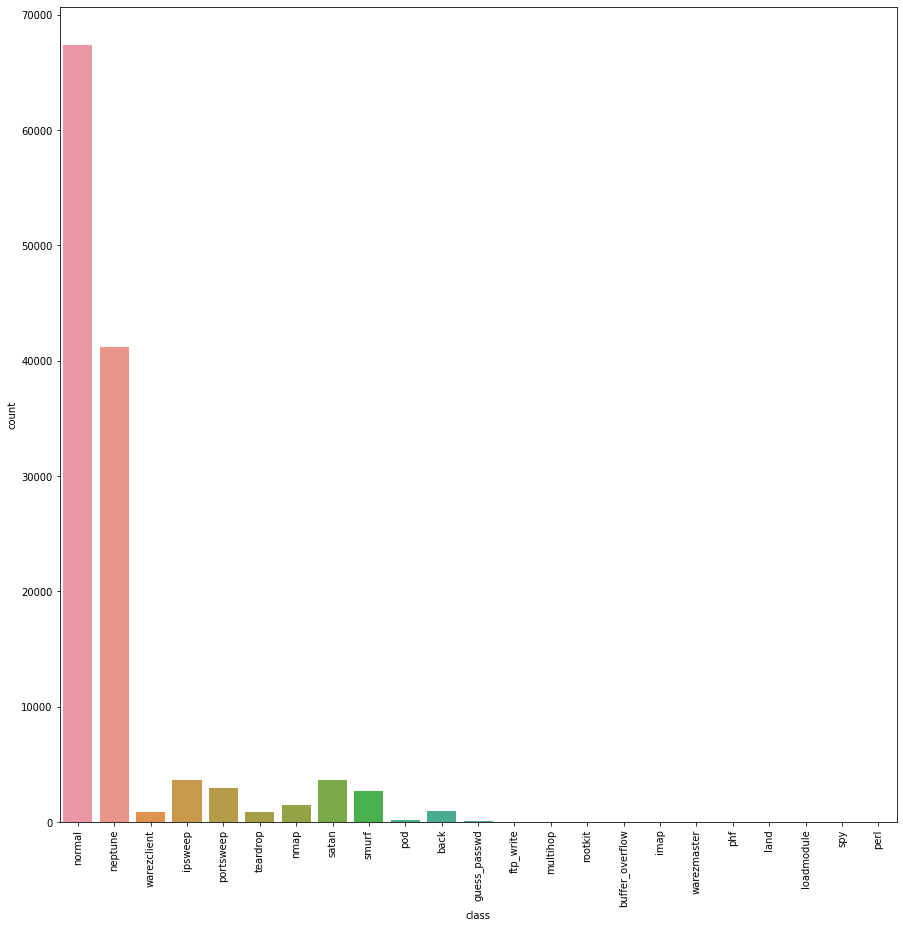

In [ ]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(x='class',data= kdd_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [ ]:
class_38_to_5 = {}
for c in ['apache2', 'Smurf', 'Neptune', 'Back', 'Teardrop', 'Pod', 'Land', 'Mailbomb', 'Processtable', 'UDPstorm']:
    class_38_to_5[c.lower()] = 'dos'
    
for c in ['Satan', 'Saint', 'Ipsweep', 'Portsweep', 'Nmap', 'Mscan']:
    class_38_to_5[c.lower()] = 'probe'
    
for c in ['WarezClient', 'guess_passwd', 'WarezMaster',
          'Imap', 'Ftp_Write', 'Named', 'MultiHop',
          'Phf', 'Spy', 'Sendmail', 'SnmpGetAttack',
          'SnmpGuess', 'Worm', 'Xsnoop', 'Xlock']:
    class_38_to_5[c.lower()] = 'r2l'
    
for c in ['Buffer_Overflow', 'httptunnel', 'Rootkit', 'LoadModule', 'Perl', 'Xterm',
          'Ps', 'SQLattack']:
    class_38_to_5[c.lower()] = 'u2r'

class_38_to_5['normal'] = 'normal'

In [ ]:
kdd_data['class'] = kdd_data['class'].apply(lambda c: class_38_to_5[c])

In [ ]:
kdd_data_test['class'] = kdd_data_test['class'].apply(lambda c: class_38_to_5[c])

In [ ]:
kdd_data.drop_duplicates(subset=features, keep='first', inplace = True)

In [ ]:
kdd_data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate   class  
0                      0.00  normal  
1                      0.00  normal  
2                      0.00     dos  
3                      0.01  normal  
4                      0.00  normal  

[5 rows x 42 columns]

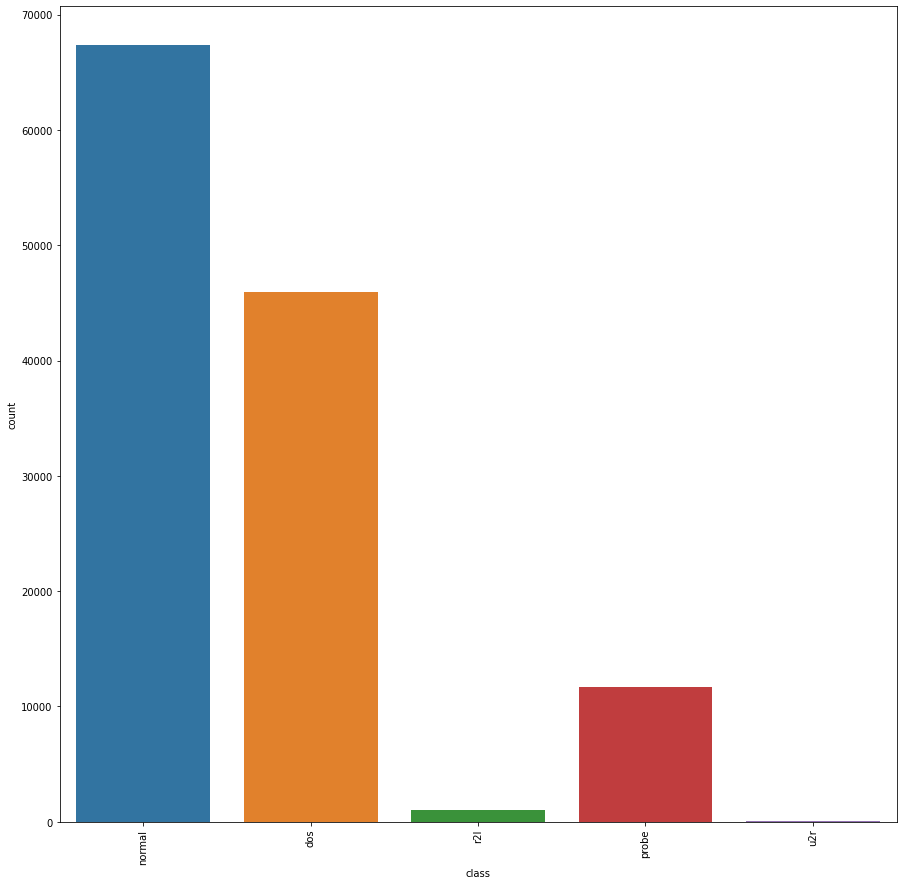

In [ ]:
plt.figure(figsize=(15, 15))
ax = sns.countplot(x='class',data= kdd_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [ ]:
kdd_data.describe()

duration     src_bytes     dst_bytes           land  \
count  125964.000000  1.259640e+05  1.259640e+05  125964.000000   
mean      287.165166  4.557000e+04  1.978053e+04       0.000198   
std      2604.607223  5.870541e+06  4.021413e+06       0.014087   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125964.000000  125964.000000  125964.000000      125964.000000   
mean         0.022689       0.000111       0.204423           0.001223   
std          0.253539       0.014367       2.150045           0.045241   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125964.000000    125964.000000  ...   125964.000000   
mean        0.395764         0.279270  ...      182.161816   
std         0.489016        23.942897  ...       99.198069   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125964.000000           125964.000000           125964.000000   
mean           115.661125                0.521207                0.082957   
std            110.702526                0.448947                0.188927   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125964.000000                125964.000000   
mean                      0.148318                     0.032545   
std                       0.308924                     0.112567   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125964.000000             125964.000000         125964.000000   
mean               0.284473                  0.278504              0.118840   
std                0.444793                  0.445679              0.306567   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125964.000000  
mean                   0.120248  
std                    0.319469  
min                    0.000000  
25

In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag','class']

In [ ]:
correlation_features = list(set(features[:-1]) - set(categorical_cols))

In [ ]:
fig, axes = plt.subplots(13,3, figsize=(15,15))

for i,f in enumerate(correlation_features):
    _ = sns.distplot(kdd_data[f],
                   kde_kws={"color": "#130931", "lw": 1.5}, 
                   hist_kws={"histtype": "bar", "edgecolor": "k", "linewidth": 1,"alpha": 0.8, "color": "#92c5de"},
                   ax=axes[i//3, i%3])

fig.tight_layout(pad=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
kdd_data.corr()

duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.070737   0.034878 -0.001553   
src_bytes                    0.070737   1.000000   0.000204 -0.000109   
dst_bytes                    0.034878   0.000204   1.000000 -0.000069   
land                        -0.001553  -0.000109  -0.000069  1.000000   
wrong_fragment              -0.009867  -0.000693  -0.000440 -0.001261   
urgent                       0.003830  -0.000059   0.000248 -0.000109   
hot                          0.000704   0.000295  -0.000344 -0.001340   
num_failed_logins            0.009528  -0.000208   0.000504 -0.000381   
logged_in                   -0.064226  -0.003353  -0.002895 -0.011403   
num_compromised              0.042679  -0.000086   0.001233 -0.000164   
root_shell                   0.052791  -0.000272   0.001069 -0.000516   
su_attempted                 0.087183  -0.000186   0.001133 -0.000344   
num_root                     0.045519  -0.000093   0.001229 -0.000175   
num_file_creations           0.099116  -0.000179   0.000089 -0.000369   
num_shells                  -0.001594  -0.000134  -0.000083 -0.000262   
num_access_files             0.070420  -0.000309   0.000339 -0.000581   
num_outbound_cmds                 NaN        NaN        NaN       NaN   
is_host_login               -0.000258  -0.000022  -0.000008 -0.000040   
is_guest_login               0.000439  -0.000742  -0.000421 -0.001374   
count                       -0.079050  -0.005153  -0.003543 -0.009837   
srv_count                   -0.039473  -0.002793  -0.001755 -0.005031   
serror_rate                 -0.069879  -0.003229  -0.003059  0.021734   
srv_serror_rate             -0.069516  -0.003439  -0.003038  0.022614   
rerror_rate                  0.200680   0.013782   0.011176 -0.004096   
srv_rerror_rate              0.199959   0.013975   0.011052 -0.005276   
same_srv_rate                0.074688   0.003899   0.003788  0.008739   
diff_srv_rate               -0.013740  -0.000432  -0.001703 -0.001552   
srv_diff_host_rate          -0.040157  -0.002608  -0.001674  0.038108   
dst_host_count               0.050562  -0.005793   0.002527 -0.025504   
dst_host_srv_count          -0.109788  -0.006861  -0.004224 -0.014160   
dst_host_same_srv_rate      -0.116001  -0.006572  -0.004423  0.011599   
dst_host_diff_srv_rate       0.254194   0.000900   0.011031 -0.004516   
dst_host_same_src_port_rate  0.228821   0.000433   0.011751  0.033863   
dst_host_srv_diff_host_rate -0.026672  -0.001655  -0.001281  0.070474   
dst_host_serror_rate        -0.064954  -0.004503  -0.003024  0.019840   
dst_host_srv_serror_rate    -0.064366  -0.003397  -0.002944  0.012275   
dst_host_rerror_rate         0.173813  -0.001468   0.011729 -0.005223   
dst_host_srv_rerror_rate     0.199022   0.012449   0.011223 -0.005303   

                             wrong_fragment    urgent       hot  \
duration                          -0.009867  0.003830  0.000704   
src_bytes                         -0.000693 -0.000059  0.000295   
dst_bytes                         -0.000440  0.000248 -0.000344   
land                              -0.001261 -0.000109 -0.001340   
wrong_fragment                     1.000000 -0.000692 -0.008509   
urgent                            -0.000692  1.000000  0.000293   
hot                               -0.008509  0.000293  1.000000   
num_failed_logins                 -0.002418  0.097507  0.003715   
logged_in                         -0.072425  0.007299  0.116432   
num_compromised                   -0.001044  0.033329  0.002013   
root_shell                        -0.003280  0.075199  0.015378   
su_attempted                      -0.002187  0.097710  0.000130   
num_root                          -0.001108  0.032470  0.001510   
num_file_creations                -0.002343  0.024918  0.028716   
num_shells                        -0.001665 -0.000144  0.004722   
num_access_files                  -0.003689  0.010803 -0.001987   
num_outbound_cmds                       Na

In [ ]:
plt.figure(figsize=(30,20))
plt.xticks(size=16,weight='bold')
plt.yticks(size=16,weight='bold')
sns.heatmap(kdd_data.corr(),annot=True)

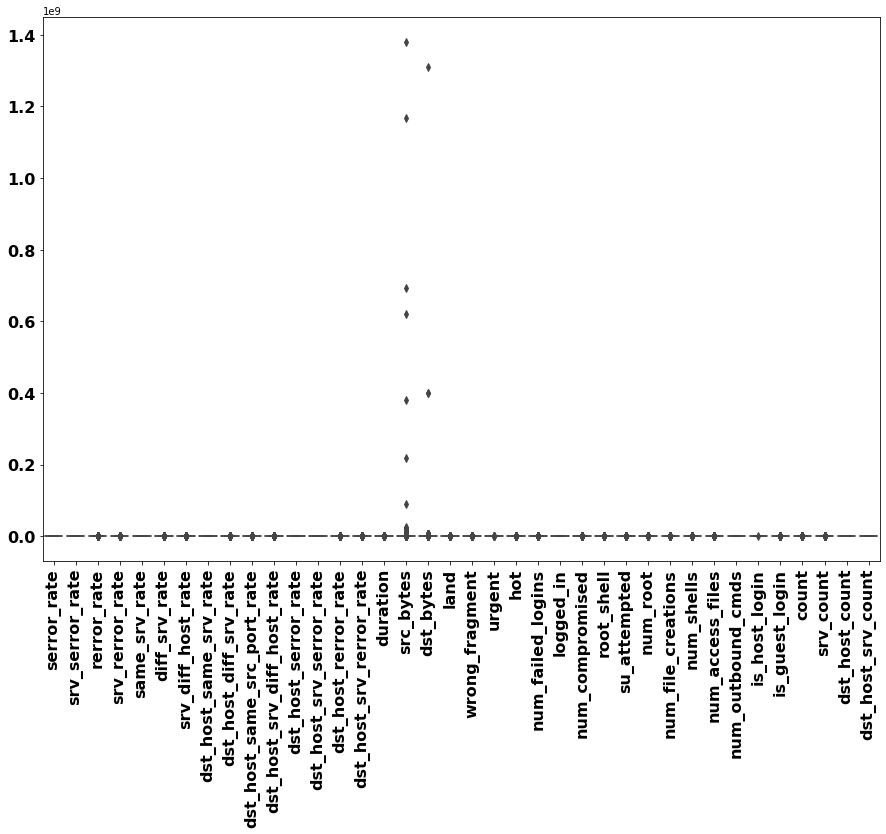

In [ ]:
#kdd_data.boxplot(figsize=(30,20))
a=kdd_data.select_dtypes('float').columns
b=kdd_data.select_dtypes('int').columns
columns = a.append(b)
b_data = kdd_data[columns]
plt.figure(figsize=(15,10))
plt.xticks(size=16,weight='bold', rotation= 90)
plt.yticks(size=16,weight='bold')
sns.boxplot(data=b_data)

In [ ]:
print(len(kdd_data['class'].unique()))
print(len(kdd_data['protocol_type'].unique()))
print(len(kdd_data['service'].unique()))
print(len(kdd_data['flag'].unique()))

5
3
70
11


In [ ]:
print(len(kdd_data_test['class'].unique()))
print(len(kdd_data_test['protocol_type'].unique()))
print(len(kdd_data_test['service'].unique()))
print(len(kdd_data_test['flag'].unique()))

5
3
64
11


In [ ]:
lst_1=list(kdd_data['service'].unique())
lst_2=list(kdd_data_test['service'].unique())

In [ ]:
np.sort(lst_1)
np.sort(lst_2)

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc',
       'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urp_i',
       'uucp', 'uucp_path', 'vmnet', 'whois'], dtype='<U11')

In [ ]:
lst_unique=[]
for i in lst_1:
    if i not in lst_2:
        lst_unique.append(i)
        print(i)

red_i
urh_i
http_8001
aol
http_2784
harvest


In [ ]:
lst_unique

['red_i', 'urh_i', 'http_8001', 'aol', 'http_2784', 'harvest']

In [ ]:
kdd_data

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                  25   
1                    0       0    0  ...                   1   
2                    0       0    0  ...                  26   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                 255   
...                ...     ...  ...  ...                 ...   
125968               0       0    0  ...                  25   
125969               0       0    0  ...                 244   
125970               0       0    0  ...                  30   
125971               0       0    0  ...                   8   
125972               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.17                    0.03   
1                         0.00                    0.60   
2                         0.10                    0.05   
3                         1.00                    0.00   
4                         1.00                    0.00   
...                        ...                     ...   
125968                    0.10                    0.06   
125969                    0.96                    0.01   
125970                    0.12                    0.06   
125971                    0.03                    0.05   
125972                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
125968                         0.00                         0.00   
125969                         0.01                         0.00   
125970                         0.00                         0.00   
125971                         0.00                         0.00   
125972                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72                      0.00                  0.01   


In [ ]:
kdd_data = kdd_data[~kdd_data['service'].isin(lst_unique)]

In [ ]:
kdd_data

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0  ...                  25   
1                    0       0    0  ...                   1   
2                    0       0    0  ...                  26   
3                    0       0    0  ...                 255   
4                    0       0    0  ...                 255   
...                ...     ...  ...  ...                 ...   
125968               0       0    0  ...                  25   
125969               0       0    0  ...                 244   
125970               0       0    0  ...                  30   
125971               0       0    0  ...                   8   
125972               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.17                    0.03   
1                         0.00                    0.60   
2                         0.10                    0.05   
3                         1.00                    0.00   
4                         1.00                    0.00   
...                        ...                     ...   
125968                    0.10                    0.06   
125969                    0.96                    0.01   
125970                    0.12                    0.06   
125971                    0.03                    0.05   
125972                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
125968                         0.00                         0.00   
125969                         0.01                         0.00   
125970                         0.00                         0.00   
125971                         0.00                         0.00   
125972                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
125968                  1.00                      1.00                  0.00   
125969                  0.00                      0.00                  0.00   
125970                  0.72                      0.00                  0.01   


In [ ]:
kdd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125939 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125939 non-null  int64  
 1   protocol_type                125939 non-null  object 
 2   service                      125939 non-null  object 
 3   flag                         125939 non-null  object 
 4   src_bytes                    125939 non-null  int64  
 5   dst_bytes                    125939 non-null  int64  
 6   land                         125939 non-null  int64  
 7   wrong_fragment               125939 non-null  int64  
 8   urgent                       125939 non-null  int64  
 9   hot                          125939 non-null  int64  
 10  num_failed_logins            125939 non-null  int64  
 11  logged_in                    125939 non-null  int64  
 12  num_compromised              125939 non-null  int64  
 13 

In [ ]:
kdd_data['class'].value_counts()

normal    67325
dos       45927
probe     11640
r2l         995
u2r          52
Name: class, dtype: int64

In [ ]:
import pandas as pd

In [ ]:
a = pd.get_dummies(kdd_data['class'])
b = pd.get_dummies(kdd_data['service'])
c = pd.get_dummies(kdd_data['protocol_type'])
d = pd.get_dummies(kdd_data['flag'])

In [ ]:
at = pd.get_dummies(kdd_data_test['class'])
bt = pd.get_dummies(kdd_data_test['service'])
ct = pd.get_dummies(kdd_data_test['protocol_type'])
dt = pd.get_dummies(kdd_data_test['flag'])

In [ ]:
kdd_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
a,b,c,d

(        dos  normal  probe  r2l  u2r
 0         0       1      0    0    0
 1         0       1      0    0    0
 2         1       0      0    0    0
 3         0       1      0    0    0
 4         0       1      0    0    0
 ...     ...     ...    ...  ...  ...
 125968    1       0      0    0    0
 125969    0       1      0    0    0
 125970    0       1      0    0    0
 125971    1       0      0    0    0
 125972    0       1      0    0    0
 
 [125939 rows x 5 columns],
         IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  \
 0         0    0       0     0    0        0         0    0        0        0   
 1         0    0       0     0    0        0         0    0        0        0   
 2         0    0       0     0    0        0         0    0        0        0   
 3         0    0       0     0    0        0         0    0        0        0   
 4         0    0       0     0    0        0         0    0        0        0   
 ...     ...  ...     

In [ ]:
kdd_data = kdd_data.drop(['protocol_type','service','class','flag'],axis=1)
kdd_data_test = kdd_data_test.drop(['protocol_type','service','class','flag'],axis=1)

In [ ]:
kdd_data_new = pd.concat([kdd_data,b,c,d,a],axis=1)
kdd_data_new_test = pd.concat([kdd_data_test,bt,ct,dt,at],axis=1)

In [ ]:
print(len(kdd_data_new.columns))
len(kdd_data_new_test.columns)

121


121

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
kdd_data_new2 = pd.concat((kdd_data_new,kdd_data_new_test),axis=0)

In [ ]:
kdd_data_new2

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0        491          0     0               0       0    0   
1             0        146          0     0               0       0    0   
2             0          0          0     0               0       0    0   
3             0        232       8153     0               0       0    0   
4             0        199        420     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
22539         0        794        333     0               0       0    0   
22540         0        317        938     0               0       0    0   
22541         0      54540       8314     0               0       0    2   
22542         0         42         42     0               0       0    0   
22543         0          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  S1  S2  S3  SF  SH  \
0                      0          0                0  ...   0   0   0   1   0   
1                      0          0                0  ...   0   0   0   1   0   
2                      0          0                0  ...   0   0   0   0   0   
3                      0          1                0  ...   0   0   0   1   0   
4                      0          1                0  ...   0   0   0   1   0   
...                  ...        ...              ...  ...  ..  ..  ..  ..  ..   
22539                  0          1                0  ...   0   0   0   1   0   
22540                  0          1                0  ...   0   0   0   1   0   
22541                  0          1                1  ...   0   0   0   1   0   
22542                  0          0                0  ...   0   0   0   1   0   
22543                  0          0                0  ...   0   0   0   0   0   

       dos  normal  probe  r2l  u2r  
0        0       1      0    0    0  
1        0       1      0    0    0  
2        1       0      0    0    0  
3        0       1      0    0    0  
4        0       1      0    0    0  
...    ...     ...    ...  ...  ...  
22539    0       1      0    0    0  
22540    0       1      0    0    0  
22541    1       0      0    0    0  
22542    0       1      0    0    0  
22543    0       0      1    0    0  

[148483 rows x 121 columns]

In [ ]:
import seaborn as sns

In [ ]:
PC_data = kdd_data_new2
pca = PCA(n_components=5)
pca.fit(kdd_data_new2)

PCA(n_components=5)

In [ ]:
print(pca.explained_variance_ratio_)

[6.80872478e-01 3.19127381e-01 1.40050529e-07 4.99370649e-10
 2.52375711e-10]


In [ ]:
plt.figure(figsize=(6,5))
plt.bar(range(len(pca.explained_variance_)),pca.explained_variance_,color='green')
plt.xticks(list(range(len(pca.explained_variance_))))
plt.title('PCA', size= 18,weight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(19,5))
plt.bar(range(len(pca.components_[0])),abs(pca.components_[0]),color='green')
plt.xticks(np.arange(len(kdd_data_new.columns)), kdd_data_new.columns, rotation=90, size = 9)
plt.yticks(size=9)
plt.title('PCA Loadings', size= 18,weight='bold')
plt.ylabel('Component 1 Loadings',size=16,weight='bold')
plt.xlabel('Features',size=16,weight='bold')
plt.show()

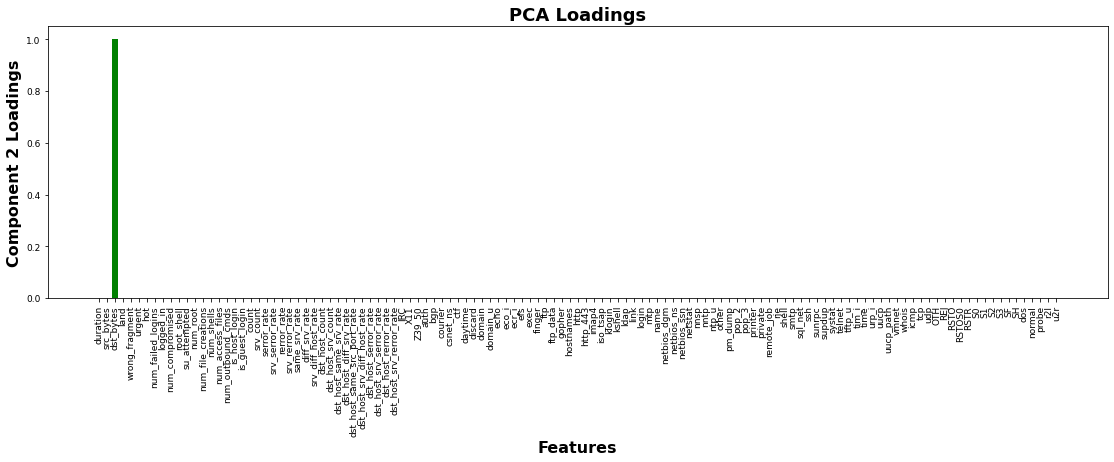

In [ ]:
plt.figure(figsize=(19,5))
plt.bar(range(len(pca.components_[1])),abs(pca.components_[1]),color='green')
plt.xticks(np.arange(len(kdd_data_new.columns)), kdd_data_new.columns, rotation=90, size = 9)
plt.yticks(size=9)
plt.title('PCA Loadings', size= 18,weight='bold')
plt.ylabel('Component 2 Loadings',size=16,weight='bold')
plt.xlabel('Features',size=16,weight='bold')
plt.show()

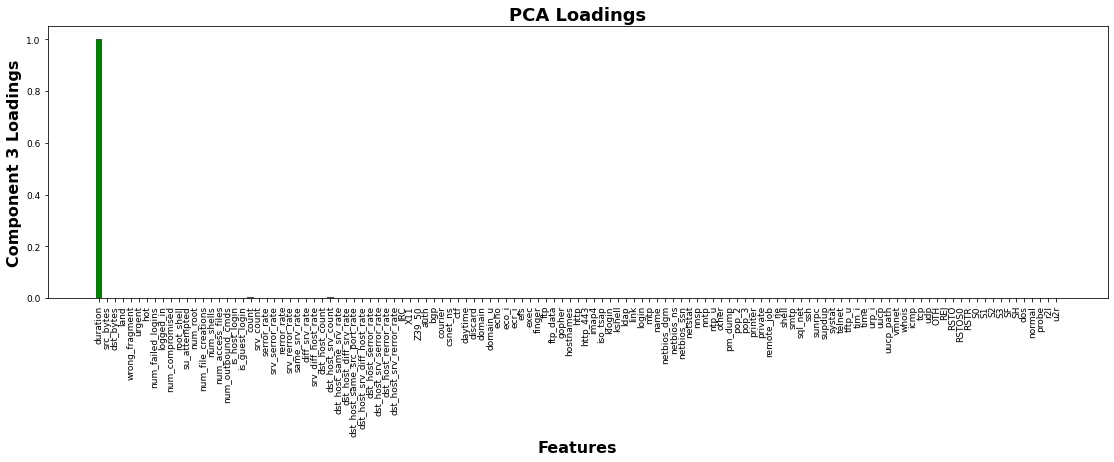

In [ ]:
plt.figure(figsize=(19,5))
plt.bar(range(len(pca.components_[2])),abs(pca.components_[2]),color='green')
plt.xticks(np.arange(len(kdd_data_new.columns)), kdd_data_new.columns, rotation=90, size = 9)
plt.yticks(size=9)
plt.title('PCA Loadings', size= 18,weight='bold')
plt.ylabel('Component 3 Loadings',size=16,weight='bold')
plt.xlabel('Features',size=16,weight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(19,5))
plt.bar(range(len(pca.components_[3])),abs(pca.components_[3]),color='green')
plt.xticks(np.arange(len(kdd_data_new.columns)), kdd_data_new.columns, rotation=90, size = 9)
plt.yticks(size=9)
plt.title('PCA Loadings', size= 18,weight='bold')
plt.ylabel('Component 4 Loadings',size=16,weight='bold')
plt.xlabel('Features',size=16,weight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(19,5))
plt.bar(range(len(pca.components_[4])),abs(pca.components_[4]),color='green')
plt.xticks(np.arange(len(kdd_data_new.columns)), kdd_data_new.columns, rotation=90, size = 9)
plt.yticks(size=9)
plt.title('PCA Loadings', size= 18,weight='bold')
plt.ylabel('Component 5 Loadings',size=16,weight='bold')
plt.xlabel('Features',size=16,weight='bold')
plt.show()

In [ ]:
main_feats = []
for i in np.arange(5):
    main_feats.append(np.argmax(pca.components_[i]))
print(main_feats)

[1, 2, 0, 19, 29]


In [ ]:
temp1 = list(pca.components_[3]) 
    
#First Highest value: 
print(max(temp1))
temp1.remove(max(temp1))

# Second Highest value:
print(max(temp1))
main_feats.append(np.argmax(temp1))
temp1.remove(max(temp1))


# Third Highest Value:
print(max(temp1))
main_feats.append(np.argmax(temp1))
temp1.remove(max(temp1))


# Fourth Highest Value:
print(max(temp1))
main_feats.append(np.argmax(temp1))

0.7132695731045349
0.45521072198232226
0.17148625206090218
0.0022813708549970376


In [ ]:
temp2 = list(pca.components_[4]) 
    
#First Highest value: 
print(max(temp2))
temp2.remove(max(temp2))

# Second Highest value:
print(max(temp2))
main_feats.append(np.argmax(temp2))
temp2.remove(max(temp2))


# Third Highest Value:
print(max(temp2))
main_feats.append(np.argmax(temp2))
temp2.remove(max(temp2))



# Fourth Highest Value:
print(max(temp2))
main_feats.append(np.argmax(temp2))

0.7571060985612528
0.5509830525814635
0.33353376097975795
0.10905890853509961


In [ ]:
main_feats

[1, 2, 0, 19, 29, 27, 19, 113, 20, 19, 26]

In [ ]:
main_feats = list(set(main_feats))
main_feats

[0, 1, 2, 113, 19, 20, 26, 27, 29]

In [ ]:
kdd_data_new.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'S1', 'S2', 'S3', 'SF', 'SH', 'dos', 'normal', 'probe', 'r2l', 'u2r'],
      dtype='object', length=121)

In [ ]:
normal = kdd_data_new[kdd_data_new['normal']==1]
dos = kdd_data_new[kdd_data_new['dos']==1]
probe = kdd_data_new[kdd_data_new['probe']==1]
r2l = kdd_data_new[kdd_data_new['r2l']==1]
u2r = kdd_data_new[kdd_data_new['u2r']==1]

In [ ]:
def feature_vis(feat):
  normal[feat].hist()
  plt.title("Output 'Normal' with " + feat, size= 11,weight='bold')
  plt.show()
  dos[feat].hist()
  plt.title("Output 'dos' with " + feat, size= 11,weight='bold')  
  plt.show()
  probe[feat].hist()
  plt.title("Output 'probe' with " + feat, size= 11,weight='bold')  
  plt.show()
  r2l[feat].hist()
  plt.title("Output 'r2l' with " + feat, size= 11,weight='bold')  
  plt.show()
  u2r[feat].hist()
  plt.title("Output 'u2r' with " + feat, size= 11,weight='bold')  
  plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
kdd_data_new.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                0.00             150                  25   
1           0.15                0.00             255                   1   
2           0.07                0.00             255                  26   
3           0.00                0.00              30                 255   
4           0.00                0.09             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  \
0                      0.00    0    0       0     0    0        0         0   
1                      0.0

In [ ]:
important_features = kdd_data_new[['src_bytes', 'dst_bytes', 'duration', 'count', 'dst_host_srv_count', 'srv_count', 'count', 'dst_host_count']]
important_features.columns

Index(['src_bytes', 'dst_bytes', 'duration', 'count', 'dst_host_srv_count',
       'srv_count', 'count', 'dst_host_count'],
      dtype='object')

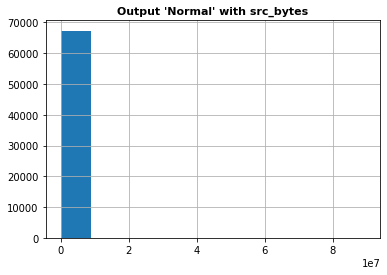

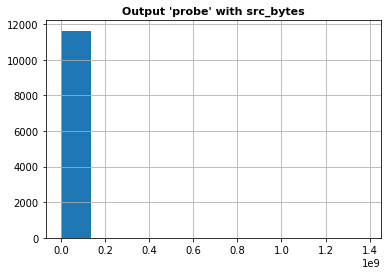

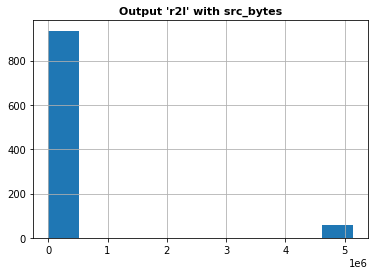

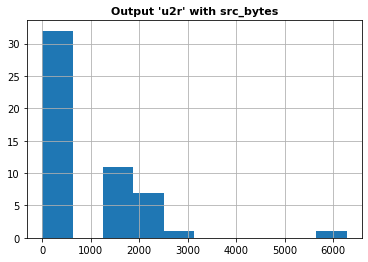

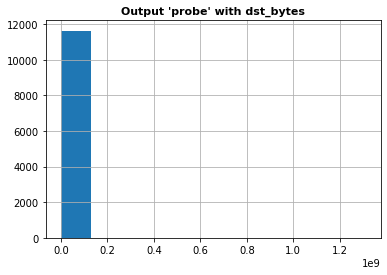

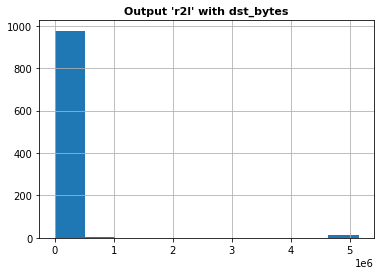

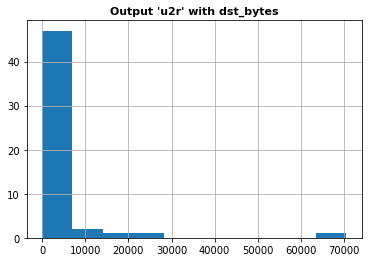

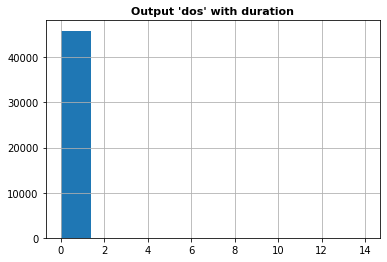

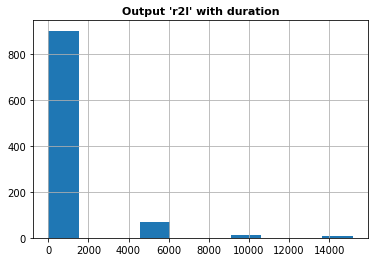

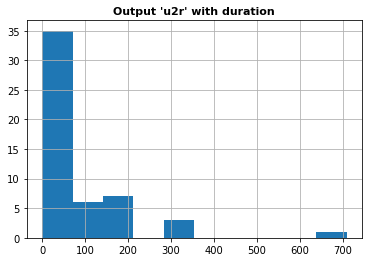

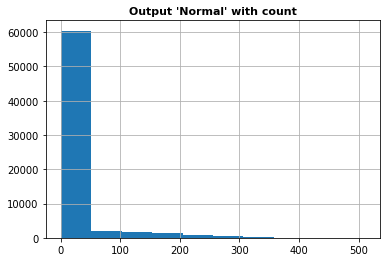

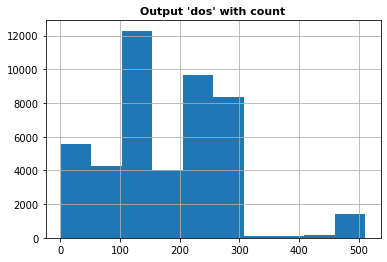

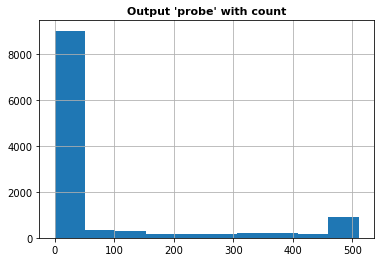

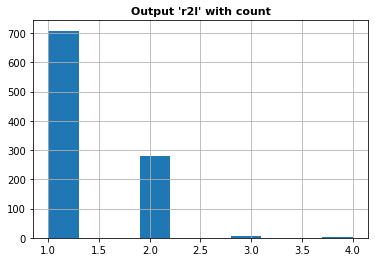

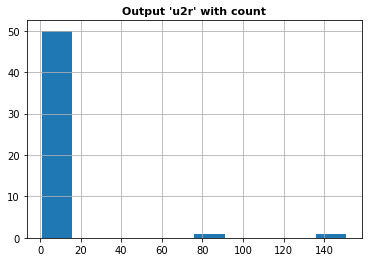

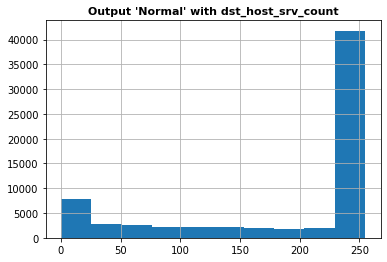

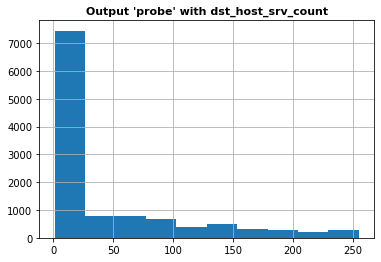

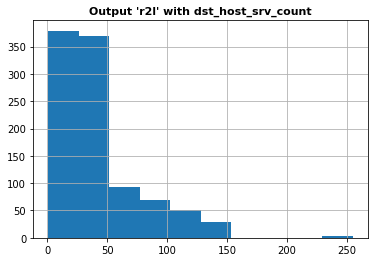

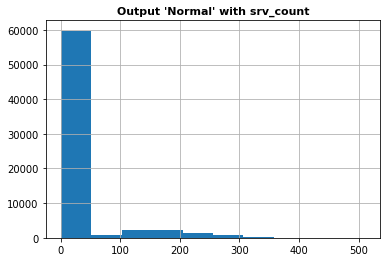

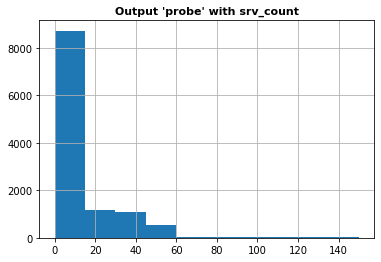

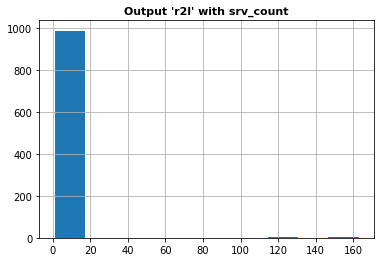

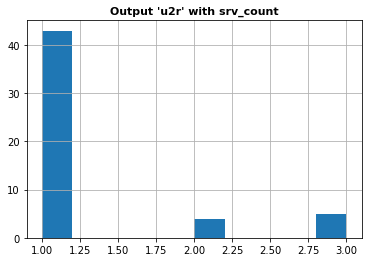

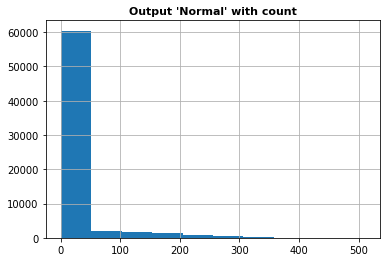

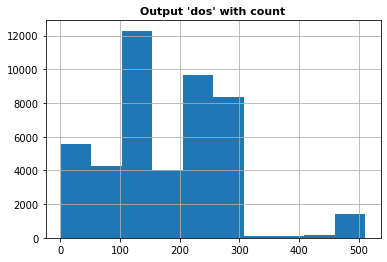

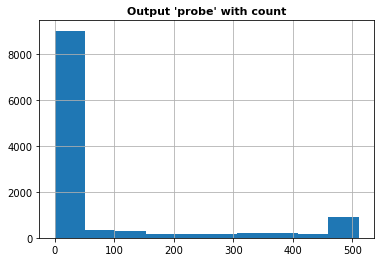

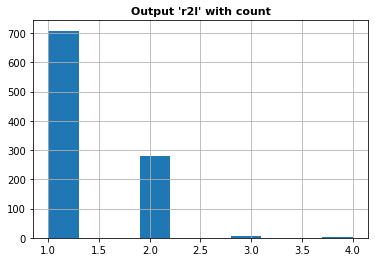

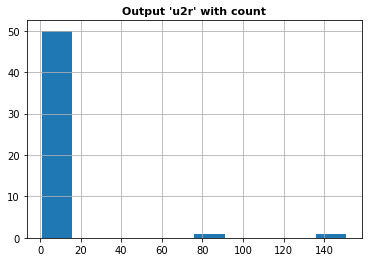

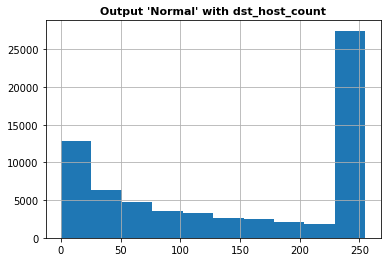

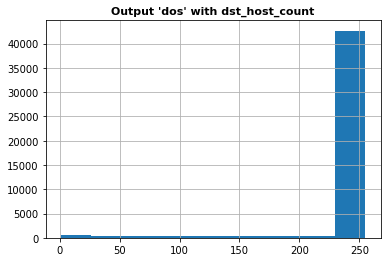

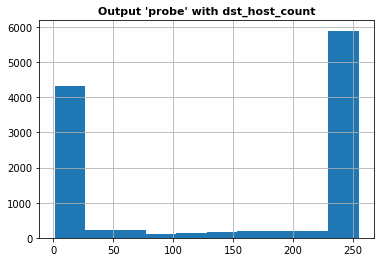

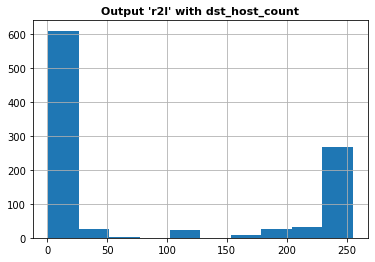

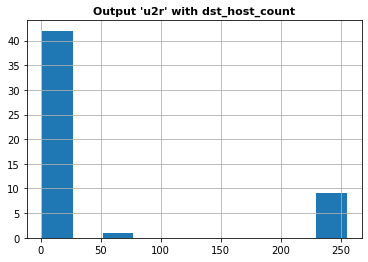

In [ ]:
for column in important_features.columns:
    feature_vis(column)

# Modeling without features extraction

In [ ]:
!pip install catboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 84 kB/s 


In [ ]:
kdd_data_new.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'S1', 'S2', 'S3', 'SF', 'SH', 'dos', 'normal', 'probe', 'r2l', 'u2r'],
      dtype='object', length=121)

In [ ]:
X_train = kdd_data_new.iloc[:,:-5]
X_test = kdd_data_new_test.iloc[:,:-5]

In [ ]:
Y_train = kdd_data_new.iloc[:,-5:]
Y_test = kdd_data_new_test.iloc[:,-5:]

In [ ]:
Scale_X = MinMaxScaler()

In [ ]:
X_train = Scale_X.fit_transform(X_train)
X_test = Scale_X.transform(X_test)

In [ ]:
X_test.shape,X_train.shape,Y_train.shape,Y_test.shape

((22544, 116), (125939, 116), (125939, 5), (22544, 5))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7458
           1       0.67      0.97      0.79      9711
           2       0.88      0.59      0.70      2421
           3       0.99      0.08      0.15      2754
           4       0.33      0.01      0.01       200

   micro avg       0.77      0.75      0.76     22544
   macro avg       0.77      0.48      0.50     22544
weighted avg       0.82      0.75      0.72     22544
 samples avg       0.75      0.75      0.75     22544



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model.predict(X_test))

0.7473385379701917

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators':[5,10,30,40,50], 'max_depth':[3,5,10,100],'criterion':['gini','entropy']}
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters)

In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 100],
                         'n_estimators': [5, 10, 30, 40, 50]})

In [ ]:
model_best = clf.best_estimator_

In [ ]:
model_best.predict(X_test)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
y_testing = np.argmax(model_best.predict(X_test),axis=1)
y_actual = np.argmax(Y_test.values,axis=1)

In [ ]:
np.unique(y_testing)

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model_best.predict(X_test))

0.751375088715401

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_testing))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7458
           1       0.67      0.97      0.79      9711
           2       0.86      0.59      0.70      2421
           3       0.98      0.05      0.10      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.76     22544
   macro avg       0.69      0.49      0.49     22544
weighted avg       0.81      0.76      0.72     22544



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actual,y_testing)

array([[6149, 1267,   42,    0,    0],
       [  86, 9437,  185,    1,    2],
       [ 341,  647, 1433,    0,    0],
       [  97, 2512,    1,  143,    1],
       [  13,  183,    2,    2,    0]])

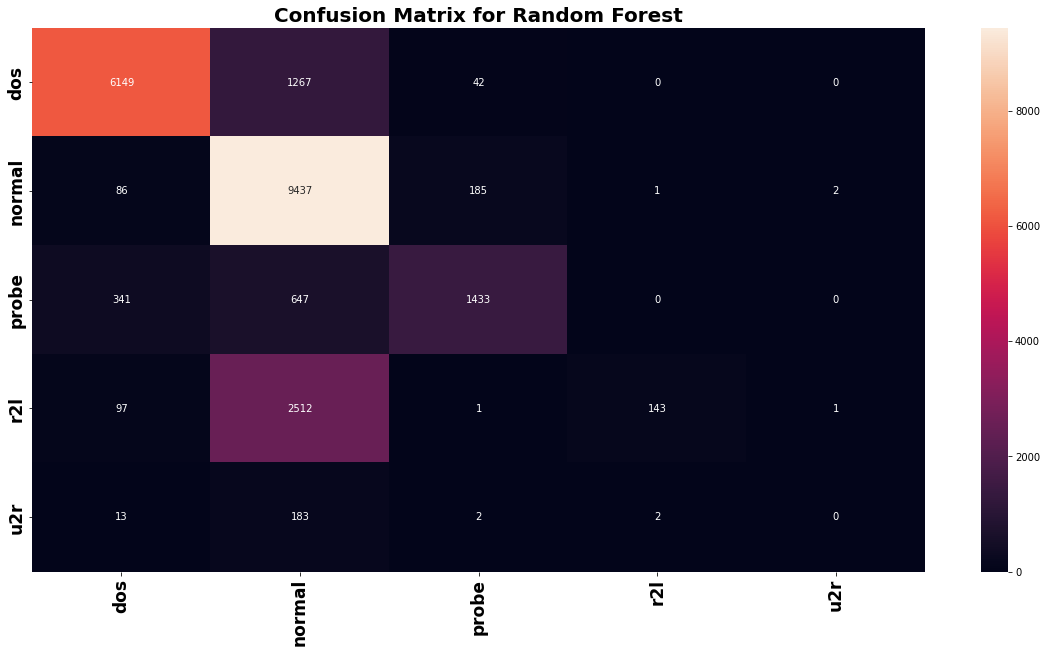

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold',rotation=90)
plt.yticks(size=17,weight='bold',rotation=90)
plt.title('Confusion Matrix for Random Forest',size=20,weight='bold')
sns.heatmap(confusion_matrix(y_actual,y_testing),annot=True,fmt='g', xticklabels=Y_train.columns, yticklabels=Y_train.columns)
#plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Y_train_knn = np.argmax(Y_train.values,axis=1)
Y_test_knn = np.argmax(Y_test.values,axis=1)
X_train_knn = X_train
X_test_knn = X_test

In [ ]:
np.unique(Y_test_knn)

array([0, 1, 2, 3, 4])

In [ ]:
X_test_knn.shape,X_train_knn.shape,Y_train_knn.shape,Y_test_knn.shape

((22544, 116), (125939, 116), (125939,), (22544,))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_knn,neigh.predict(X_test_knn))

array([[6091, 1328,   39,    0,    0],
       [  56, 9029,  620,    3,    3],
       [ 340,  400, 1639,   42,    0],
       [   2, 2636,    5,  110,    1],
       [   0,  163,   18,    1,   18]])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(Y_test_knn,neigh.predict(X_test_knn)))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      7458
           1       0.67      0.93      0.78      9711
           2       0.71      0.68      0.69      2421
           3       0.71      0.04      0.08      2754
           4       0.82      0.09      0.16       200

    accuracy                           0.75     22544
   macro avg       0.77      0.51      0.52     22544
weighted avg       0.77      0.75      0.71     22544



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_knn,neigh.predict(X_test_knn))

0.7490684882895671

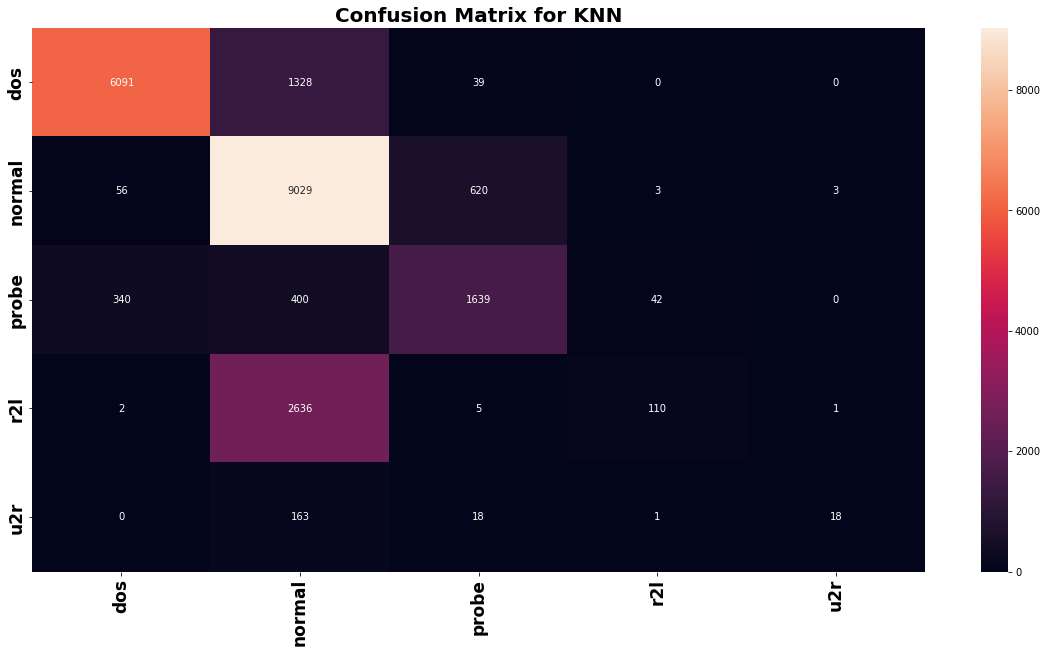

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold',rotation=90)
plt.yticks(size=17,weight='bold',rotation=90)
plt.title('Confusion Matrix for KNN',size=20,weight='bold')
sns.heatmap(confusion_matrix(Y_test_knn,neigh.predict(X_test_knn)),annot=True,fmt='g', xticklabels=Y_test.columns, yticklabels=Y_test.columns)
#plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')

# CatBoost

In [ ]:
X_train

array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.05799870e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.61670897e-06, 2.93143779e-07, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.09423153e-07, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
Y_train.values

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
y_train = np.argmax(Y_train.values,axis=1)
y_test = np.argmax(Y_test.values,axis=1)

In [ ]:
#categorical_features = np.where(X.dtypes != np.float)[0]

params = {'iterations':5000,
        'learning_rate':0.01,
        'depth':8,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':1000, # most recent best iteration to wait before stopping
        'random_seed': 2,
          'loss_function':'MultiClass'
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=False, # True if we don't want to save trees created after iteration with the best validation score
          plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8580467	best: 0.8580467 (0)	total: 474ms	remaining: 39m 31s
200:	test: 0.9054540	best: 0.9101944 (15)	total: 1m 18s	remaining: 31m 14s
400:	test: 0.9105091	best: 0.9106340 (382)	total: 2m 37s	remaining: 30m 6s
600:	test: 0.9130219	best: 0.9130728 (586)	total: 4m	remaining: 29m 23s
800:	test: 0.9148683	best: 0.9153625 (744)	total: 5m 24s	remaining: 28m 22s
1000:	test: 0.9174215	best: 0.9175881 (989)	total: 6m 49s	remaining: 27m 16s
1200:	test: 0.9187677	best: 0.9187677 (1200)	total: 8m 14s	remaining: 26m 4s
1400:	test: 0.9202986	best: 0.9202986 (1400)	total: 9m 41s	remaining: 24m 53s
1600:	test: 0.9223998	best: 0.9224521 (1593)	total: 11m 9s	remaining: 23m 40s
1800:	test: 0.9233148	best: 0.9233461 (1791)	total: 12m 40s	remaining: 22m 30s
2000:	test: 0.9258343	best: 0.9258946 (1988)	total: 14m 11s	remaining: 21m 16s
2200:	test: 0.9278911	best: 0.9278911 (2200)	total: 15m 45s	remaining: 20m 3s
2400:	test: 0.9297289	best: 0.9297409 (2395)	total: 17m 17s	remaining: 18m 43s
2600:	

In [ ]:
cat_model.best_score_

{'learn': {'MultiClass': 0.0022106184648386226},
 'validation': {'AUC:type=Mu': 0.933375647809932,
  'MultiClass': 0.7834336000714871}}

In [ ]:
y_testing = cat_model.predict(X_test)

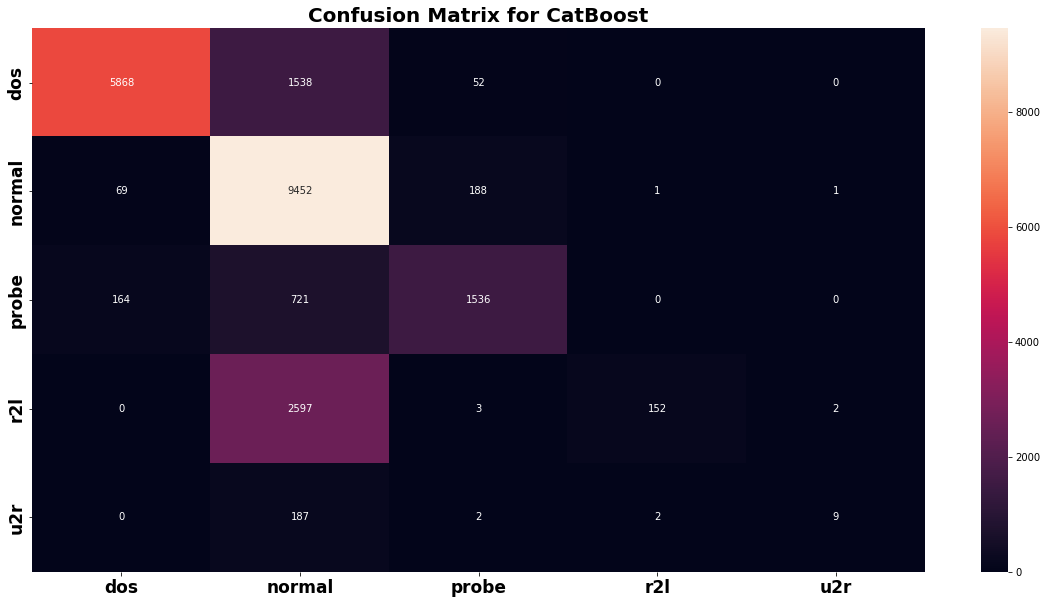

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold')
plt.yticks(size=17,weight='bold')
plt.title('Confusion Matrix for CatBoost',size=20,weight='bold')
sns.heatmap(confusion_matrix(y_test,y_testing),annot=True,fmt='g', xticklabels=Y_train.columns, yticklabels=Y_train.columns)
plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')

# Modeling With feature extraction

In [ ]:
kdd_data_new = kdd_data_new.iloc[:,main_feats]  

In [ ]:
kdd_data_new_test = kdd_data_new_test.iloc[:,main_feats]

In [ ]:
kdd_data_new = pd.concat([kdd_data_new,a],axis=1)
kdd_data_new

duration  src_bytes  dst_bytes  S3  count  srv_count  diff_srv_rate  \
0              0        491          0   0      2          2           0.00   
1              0        146          0   0     13          1           0.15   
2              0          0          0   0    123          6           0.07   
3              0        232       8153   0      5          5           0.00   
4              0        199        420   0     30         32           0.00   
...          ...        ...        ...  ..    ...        ...            ...   
125968         0          0          0   0    184         25           0.06   
125969         8        105        145   0      2          2           0.00   
125970         0       2231        384   0      1          1           0.00   
125971         0          0          0   0    144          8           0.05   
125972         0        151          0   0      1          1           0.00   

        srv_diff_host_rate  dst_host_srv_count  dos  normal  probe  r2l  u2r  
0                     0.00                  25    0       1      0    0    0  
1                     0.00                   1    0       1      0    0    0  
2                     0.00                  26    1       0      0    0    0  
3                     0.00                 255    0       1      0    0    0  
4                     0.09                 255    0       1      0    0    0  
...                    ...                 ...  ...     ...    ...  ...  ...  
125968                0.00                  25    1       0      0    0    0  
125969                0.00                 244    0       1      0    0    0  
125970                0.00                  30    0       1      0    0    0  
125971                0.00                   8    1       0      0    0    0  
125972                0.00                  77    0       1      0    0    0  

[125939 rows x 14 columns]

In [ ]:
kdd_data_new_test = pd.concat([kdd_data_new_test,at],axis=1)
kdd_data_new_test

duration  src_bytes  dst_bytes  S3  count  srv_count  diff_srv_rate  \
0             0          0          0   0    229         10           0.06   
1             0          0          0   0    136          1           0.06   
2             2      12983          0   0      1          1           0.00   
3             0         20          0   0      1         65           0.00   
4             1          0         15   0      1          8           0.00   
...         ...        ...        ...  ..    ...        ...            ...   
22539         0        794        333   0      1          1           0.00   
22540         0        317        938   0      2         11           0.00   
22541         0      54540       8314   0      5         10           0.00   
22542         0         42         42   0      4          6           0.00   
22543         0          0          0   0      4         10           1.00   

       srv_diff_host_rate  dst_host_srv_count  dos  normal  probe  r2l  u2r  
0                    0.00                  10    1       0      0    0    0  
1                    0.00                   1    1       0      0    0    0  
2                    0.00                  86    0       1      0    0    0  
3                    1.00                  57    0       0      1    0    0  
4                    0.75                  86    0       0      1    0    0  
...                   ...                 ...  ...     ...    ...  ...  ...  
22539                0.00                 141    0       1      0    0    0  
22540                0.18                 255    0       1      0    0    0  
22541                0.20                 255    1       0      0    0    0  
22542                0.33                 252    0       1      0    0    0  
22543                1.00                  21    0       0      1    0    0  

[22544 rows x 14 columns]

In [ ]:
X_train = kdd_data_new.iloc[:,:-5]
X_test = kdd_data_new_test.iloc[:,:-5]

In [ ]:
Y_train = kdd_data_new.iloc[:,-5:]
Y_test = kdd_data_new_test.iloc[:,-5:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Scale_X = MinMaxScaler()

In [ ]:
X_train = Scale_X.fit_transform(X_train)
X_test = Scale_X.transform(X_test)

In [ ]:
X_test.shape,X_train.shape,Y_train.shape,Y_test.shape

((22544, 9), (125939, 9), (125939, 5), (22544, 5))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7458
           1       0.64      0.97      0.77      9711
           2       0.86      0.59      0.70      2421
           3       0.50      0.00      0.00      2754
           4       0.83      0.03      0.05       200

   micro avg       0.75      0.74      0.74     22544
   macro avg       0.76      0.47      0.48     22544
weighted avg       0.76      0.74      0.70     22544
 samples avg       0.74      0.74      0.74     22544



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model.predict(X_test))

0.7400638750887154

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators':[5,10,30,40,50], 'max_depth':[3,5,10,100],'criterion':['gini','entropy']}
model = RandomForestClassifier()
clf = GridSearchCV(model, parameters)

In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 100],
                         'n_estimators': [5, 10, 30, 40, 50]})

In [ ]:
model_best = clf.best_estimator_

In [ ]:
model_best.predict(X_test)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
y_testing = np.argmax(model_best.predict(X_test),axis=1)
y_actual = np.argmax(Y_test.values,axis=1)

In [ ]:
np.unique(y_testing)

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model_best.predict(X_test))

0.7415720369056068

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_testing))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      7458
           1       0.64      0.97      0.77      9711
           2       0.86      0.58      0.69      2421
           3       0.00      0.00      0.00      2754
           4       0.86      0.03      0.06       200

    accuracy                           0.74     22544
   macro avg       0.66      0.48      0.48     22544
weighted avg       0.69      0.74      0.69     22544



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_actual,y_testing)

array([[5919, 1515,   24,    0,    0],
       [ 108, 9421,  181,    0,    1],
       [ 172,  833, 1416,    0,    0],
       [   9, 2718,   27,    0,    0],
       [   4,  182,    7,    1,    6]])

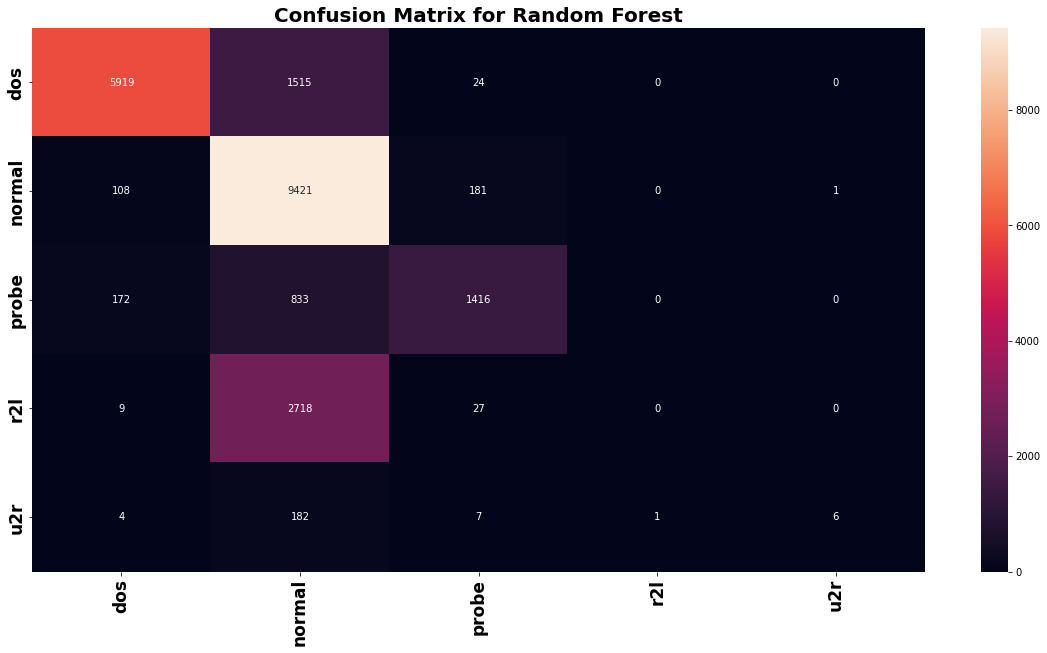

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold',rotation=90)
plt.yticks(size=17,weight='bold',rotation=90)
plt.title('Confusion Matrix for Random Forest',size=20,weight='bold')
sns.heatmap(confusion_matrix(y_actual,y_testing),annot=True,fmt='g', xticklabels=Y_train.columns, yticklabels=Y_train.columns)
#plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Y_train_knn = np.argmax(Y_train.values,axis=1)
Y_test_knn = np.argmax(Y_test.values,axis=1)
X_train_knn = X_train
X_test_knn = X_test

In [ ]:
np.unique(Y_test_knn)

array([0, 1, 2, 3, 4])

In [ ]:
X_test_knn.shape,X_train_knn.shape,Y_train_knn.shape,Y_test_knn.shape

((22544, 9), (125939, 9), (125939,), (22544,))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_knn,neigh.predict(X_test_knn))

array([[5220, 2204,   27,    7,    0],
       [ 477, 9047,  165,   21,    1],
       [  47,  982, 1392,    0,    0],
       [   9, 2643,   96,    6,    0],
       [  11,  177,    9,    2,    1]])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(Y_test_knn,neigh.predict(X_test_knn)))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      7458
           1       0.60      0.93      0.73      9711
           2       0.82      0.57      0.68      2421
           3       0.17      0.00      0.00      2754
           4       0.50      0.01      0.01       200

    accuracy                           0.69     22544
   macro avg       0.60      0.44      0.44     22544
weighted avg       0.67      0.69      0.65     22544



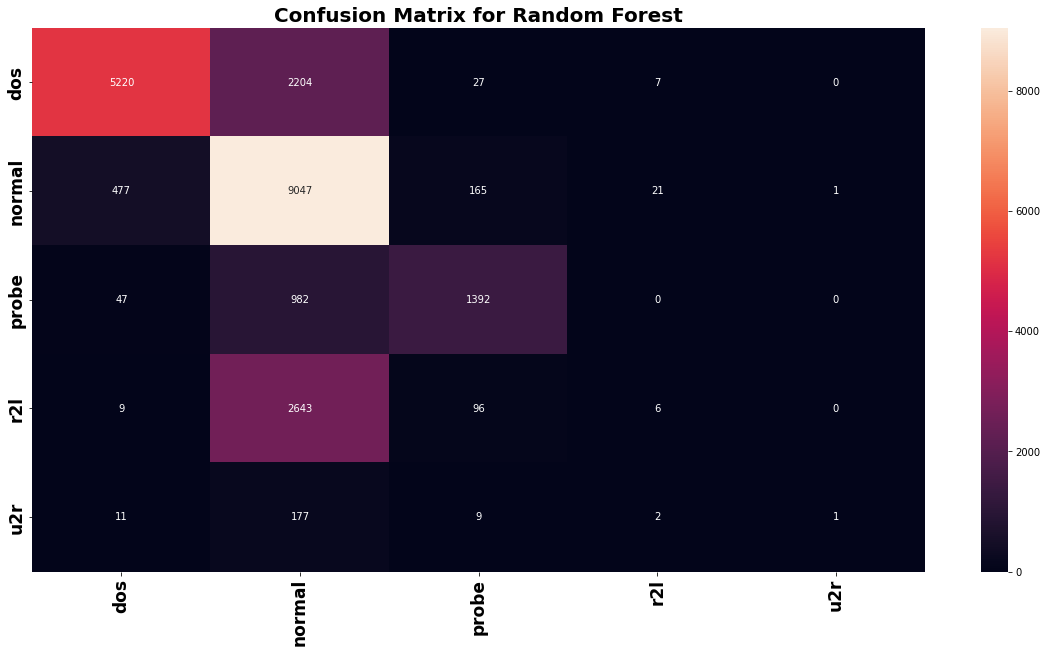

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold',rotation=90)
plt.yticks(size=17,weight='bold',rotation=90)
plt.title('Confusion Matrix for Random KNN',size=20,weight='bold')
sns.heatmap(confusion_matrix(Y_test_knn,neigh.predict(X_test_knn)),annot=True,fmt='g', xticklabels=Y_train.columns, yticklabels=Y_train.columns)
#plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')

# CatBoost

In [ ]:
Y_train.values

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
y_train = np.argmax(Y_train.values,axis=1)
y_test = np.argmax(Y_test.values,axis=1)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
#categorical_features = np.where(X.dtypes != np.float)[0]

params = {'iterations':5000,
        'learning_rate':0.01,
        'depth':8,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':1000, # most recent best iteration to wait before stopping
        'random_seed': 2,
          'loss_function':'MultiClass'
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=False, # True if we don't want to save trees created after iteration with the best validation score
          plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8226090	best: 0.8226090 (0)	total: 269ms	remaining: 8m 56s
200:	test: 0.8919200	best: 0.8920407 (189)	total: 33.7s	remaining: 5m 2s
400:	test: 0.8993247	best: 0.8996228 (385)	total: 1m 6s	remaining: 4m 26s
600:	test: 0.9046074	best: 0.9048203 (587)	total: 1m 48s	remaining: 4m 11s
800:	test: 0.9069211	best: 0.9069211 (800)	total: 2m 22s	remaining: 3m 33s
1000:	test: 0.9079494	best: 0.9081453 (975)	total: 2m 57s	remaining: 2m 56s
1200:	test: 0.9082459	best: 0.9085230 (1173)	total: 3m 33s	remaining: 2m 21s
1400:	test: 0.9074299	best: 0.9085230 (1173)	total: 4m 14s	remaining: 1m 48s
1600:	test: 0.9071573	best: 0.9085230 (1173)	total: 4m 50s	remaining: 1m 12s
1800:	test: 0.9076171	best: 0.9085230 (1173)	total: 5m 30s	remaining: 36.5s
1999:	test: 0.9074830	best: 0.9085230 (1173)	total: 6m 9s	remaining: 0us

bestTest = 0.9085230172
bestIteration = 1173



In [ ]:
cat_model.best_score_

{'learn': {'MultiClass': 0.017983343092114287},
 'validation': {'AUC:type=Mu': 0.9085230171832697,
  'MultiClass': 0.7983984447254587}}

In [ ]:
y_testing = cat_model.predict(X_test)

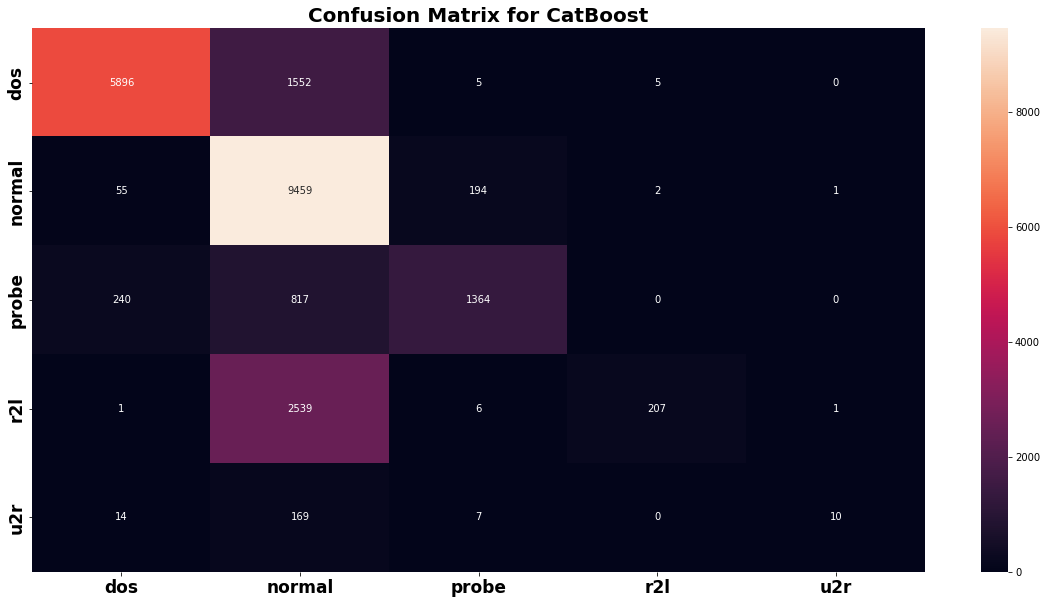

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size=17,weight='bold')
plt.yticks(size=17,weight='bold')
plt.title('Confusion Matrix for CatBoost',size=20,weight='bold')
sns.heatmap(confusion_matrix(y_test,y_testing),annot=True,fmt='g', xticklabels=Y_train.columns, yticklabels=Y_train.columns)
plt.savefig('Catboost CM',dpi=100,bbox_inches='tight')